# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

- To understand which variables are present in the dataset
- To consider distribution of features, such as minimum, maxmimum, mean, and outliers.
- To plot relationship between the independent and dependent variables and visualize which features have linear relationship
- To identify issues with data, such as incorrect or missing values

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

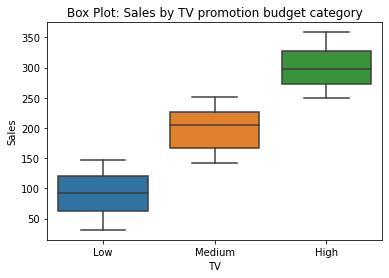

In [3]:
# Create a boxplot with TV and Sales.
sns.boxplot(x = "TV", y = "Sales", data = data)
plt.title("Box Plot: Sales by TV promotion budget category")
plt.show()

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

The boxplot shows that there are considerable variations in Sales across TV promotion budget category groups. The significance of these differences can be tested using one-way ANOVA.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

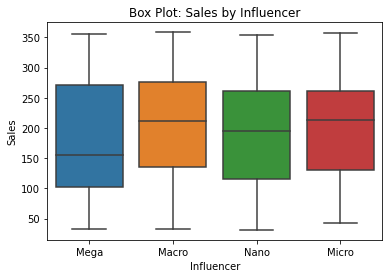

In [4]:
# Create a boxplot with Influencer and Sales.
x_order = ["Mega", "Macro", "Nano", "Micro"]
sns.boxplot(x = "Influencer", y = "Sales", data = data, order=x_order)
plt.title("Box Plot: Sales by Influencer")
plt.show()

**Question:** Is there variation in `Sales` based off the `Influencer` size?

There are some variations by different influencer size but it may not be significant.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [5]:
# Drop rows that contain missing data and update the DataFrame.
print("Before removing missing data: ", data.isna().sum())
data = data.dropna(axis=0)
# Confirm the data contains no missing values.
print("After removing missing data: ", data.isna().sum())

Before removing missing data:  TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64
After removing missing data:  TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


## **Step 3: Model building** 


In [6]:
data.head(2)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [7]:
# Define the OLS formula.
ols_formula = "Sales ~ C(TV)"

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 31 May 2023   Prob (F-statistic):          8.81e-256
Time:                        19:12:22   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** Which categorical variable did you choose for the model? Why?

'TV' was used for the model because 'TV' showed more variations with 'Sales' than 'Influencer'.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

Because the model does not indluce any continuous independent variables, the linearity assumption is no required.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

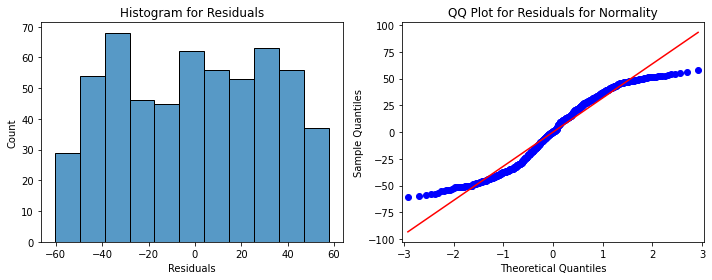

In [8]:
# Calculate the residuals.
residuals = model.resid

# Create a histogram with the residuals. 
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_title('Histogram for Residuals')
# Create a QQ plot of the residuals.

sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title('QQ Plot for Residuals for Normality')

plt.tight_layout()
plt.show()



**Question:** Is the normality assumption met?

The QQ plot above demonstrates that it does not meet the normality assumption when we use 'TV' as the independent varaible predicting 'Sales' because the distribution of points in qq plot shows s curve rather than a straight line.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

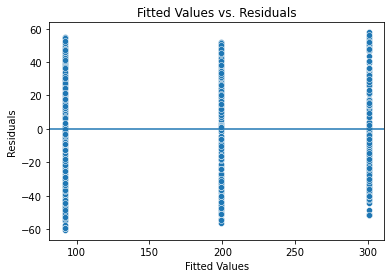

In [9]:
# Create a scatter plot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title("Fitted Values vs. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)
plt.show()


**Question:** Is the constant variance (homoscedasticity) assumption met?

The residuals distributed simliarly over the fitted values, validating that the constant variance assumption is met.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [10]:
# Display the model results summary.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 31 May 2023   Prob (F-statistic):          8.81e-256
Time:                        19:12:22   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

R-squared value of 0.874 shows that the model explains 87.4% of the variation in Sales using TV, making the model an effective predictor of Sales

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

The default TV category is 'High'. When we change to 'Medium' the Sales is likely to decrease by 101.5061 and when it is changed to 'Low', the 'Sales' will decrease by 208.8133 in average.

The p-values of all coefficients are 0.0, which is less than 0.05 meaning that there is 95% chance the interval [-215.353, -202.274] contains the true parameter of the slope of $\beta_{TVLow}$ and the interval [-108.038, -94.975] contains the true parameter of the slope of $\beta_{TVMedium}$.

**Question:** Do you think your model could be improved? Why or why not? How?

With more granular view of the TV, the model could be improved such as additional categories for TV promotion budgets. Additional variables can increaes the model performance as well.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [11]:
# Create an one-way ANOVA table for the fit model.
anova_result = sm.stats.anova_lm(model, type = 1)
print("Anova Result: \n", anova_result)

p_value = anova_result['PR(>F)'][0]
print("\nP-value:", p_value)

Anova Result: 
              df        sum_sq       mean_sq            F         PR(>F)
C(TV)       2.0  4.052692e+06  2.026346e+06  1971.455737  8.805550e-256
Residual  566.0  5.817589e+05  1.027843e+03          NaN            NaN

P-value: 8.80555037065864e-256


**Question:** What are the null and alternative hypotheses for the ANOVA test?

1. Null Hypothesis: There is no difference in Sales based on TV promotion budget
2. Alternative Hypothesis: There is difference in Sales based on TV promotion budget.

**Question:** What is your conclusion from the one-way ANOVA test?

p-value of 8.8e-256, which is less than 0.05, shows thats we reject the null hypotheses.

**Question:** What did the ANOVA test tell you?

We reject the null hypothesis and there is a statitically significant difference in Sales among TV groups.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [12]:
# Perform the Tukey's HSD post hoc test.
tukey_oneway = pairwise_tukeyhsd(endog = data['Sales'], groups = data['TV'])
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


**Question:** What is your interpretation of the Tukey HSD test?

All pairwise comparisons show that there are statistically significant difference in Sales when we change from 'High' to 'Low', "High" to "Medium", and "Low to Medium".

**Question:** What did the post hoc tell you?**

A post hoc test was conducted to determine which `TV` groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests. 

The results were that `Sales` is not the same between any pair of `TV` groups. 

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)